<h1 style="font-size:2.0rem; color:green;"> Vizualisation of spatial averge from the six datasets </h1>  

<h1 style="font-size:1.5rem; color:green;"> Load required libraries </h1> 

In [3]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2
,
import numpy as np 
import pandas as pd 
import netCDF4 as nc 
from netCDF4 import Dataset 
import matplotlib.pyplot as plt 
import xarray as xr
import datetime  

<h1 style="font-size:1.5rem; color:green;"> For parallelisation  </h1> 

<h1 style="font-size:1.5rem; color:green;"> Initialization of variables  </h1> 

In [54]:
period = slice('1982-01-01', '2014-12-31')
mons = [1,2,3,4,11,12]  
wet_months_labels = ["JAN","FEB","MAR","APR","NOV","DEC"]
dry_months_labels = ["MAY","JUN","JUL","AUG","SEP","OCT"]

output_path = r'C:\Users\Hamid\Desktop\results\figures\climatologies\monthly_average_large_domaine'              
path_model_data = r'C:\Data\Snow\SCFG\Models\LMDZ-ORCHIDEE\Modified_data\monthly_values'
path_esa_data = r'C:\Data\Snow\SCFG\Satellite\modified_data\monthly_values'
path_era_land = r'C:\Data\Snow\SCFG\Reanalysis\monthly_values'
subtitles = ["SIM_AMIP_IPSL_250km", "SIM_HighResMIP_IPSL_50km", "SIM_LMDZ-ORCHIDEE_35k", "ERA_LAND_9km", "ESA_GF_5km","ESA_ORIG_5km"]
keys_dic = ["ESA_ORIG","ESA_GF","ERA_LAND", "SIM_35k","SIM_250km","SIM_50km"]
colors = {"ESA_ORIG":'blue',"ESA_GF":'cyan',"ERA_LAND":'green', "SIM_35k":'darkgoldenrod',"SIM_250km":'orange',"SIM_50km":'yellow'}
parameters = ['scf_monthly_value', 'days_with_snow', 'scf_monthly_value_15', 'days_with_snow_15', 'ext_days_with_snow_15','ext_days_with_snow']
parameters_days = ['days_with_snow','days_with_snow_15', 'ext_days_with_snow_15','ext_days_with_snow']
parameters_scf = ['scf_monthly_value','scf_monthly_value_15']

<h1 style="font-size:1.5rem; color:green;"> Importing and preparing data</h1>

In [9]:
scf_monthly_values_esa_orig = xr.open_dataset(path_esa_data +r'\ESA_CCI_ORIG_variables_monthly_values.nc').sel(time=period).load()
scf_monthly_values_esa_gf = xr.open_dataset(path_esa_data +r'\ESA_CCI_GF_variables_monthly_values.nc').sel(time=period).load()

scf_monthly_values_lmdz_saloua_35km = xr.open_dataset(path_model_data +r'\scf_lmdz_variables_monthly_values.nc').sel(time=period).load()
scf_monthly_values_amip_250km = xr.open_dataset(path_model_data +r'\scf_AMIP_Atlas_1958_2017_variables_monthly_values.nc').sel(time=period).load()
scf_monthly_values_high_res_mip_50km = xr.open_dataset(path_model_data +r'\scf_HighResMIP_Atlas_1950_2014_variables_monthly_values.nc').sel(time=period).load()
scf_era_land_9km = xr.open_dataset(path_era_land +r'\scf_ERA_Land_1950_2022_variables_monthly_values.nc').sel(time=period).load()

<div class="alert alert-block alert-success"; background-color:red> We put the datasets in a dictionary, each dataset with a key </div> 

In [10]:
monthly_values = {"ESA_ORIG":scf_monthly_values_esa_orig,"ESA_GF":scf_monthly_values_esa_gf,"ERA_LAND": scf_era_land_9km, "SIM_35k":scf_monthly_values_lmdz_saloua_35km,"SIM_250km":scf_monthly_values_amip_250km,"SIM_50km":scf_monthly_values_high_res_mip_50km}

<div class="alert alert-block alert-success"; background-color:red> There are 5 missing dates in the time dimension of the
    data scf_monthly_values_esa_orig, we will add these dates and assign them nan values </div> 

In [13]:
"""
We detect missing dates by applying the difference function between a complete dataset and the dataset that is not
complete  
"""
missing_dates = set(monthly_values['ESA_GF'].time.values).difference(set(monthly_values['ESA_ORIG'].time.values))
missing_dates = list(missing_dates)   

# Then we convert the list of missing date to warray dataarray 
missing_date_ds = xr.DataArray(missing_dates, dims=["time"], coords=[missing_dates])

# We constract a dataaray of the whole dates period  
full_dates = xr.concat([scf_monthly_values_esa_orig.time, missing_date_ds], dim="time")

# We reindex the original dataset and fill empty values with nan
scf_monthly_values_esa_orig = scf_monthly_values_esa_orig.reindex(time=full_dates, fill_value=np.nan).sortby("time")

<div class="alert alert-block alert-success"; background-color:red> We define the formatting function of the figures </div> 

In [14]:
# This auxiliary function will help us in the formatting of the figures
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Text(0.5, 0, 'time')

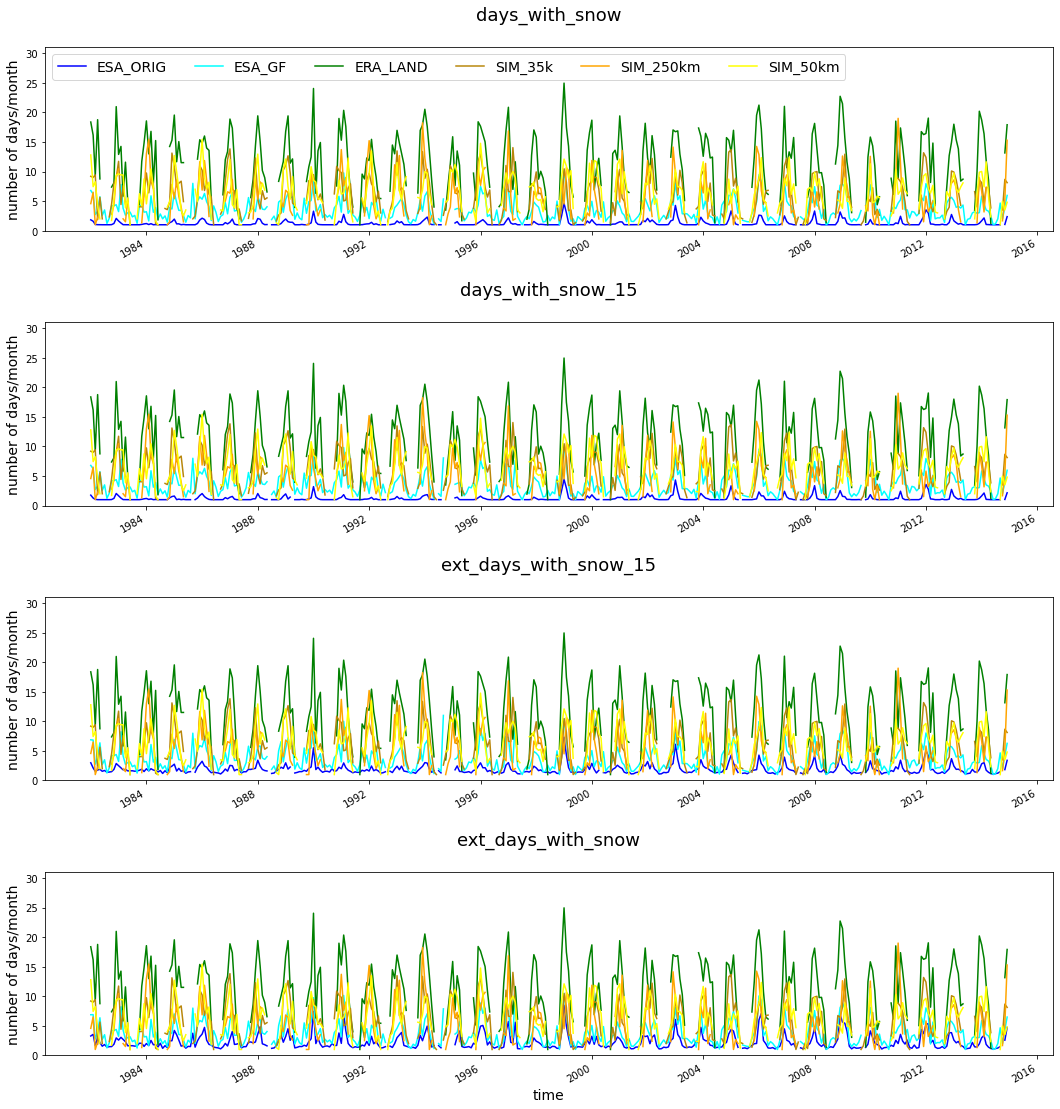

In [65]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=1)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
set_size(14,14) 

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

# Loop over all of the models
indice = 0
for par in parameters_days:
    for key in keys_dic:
        monthly_values[key][par].where(monthly_values[key][par] != 0).mean(dim=['lon','lat']).plot.line(ax=axs[indice], ylim=(0,31), color=colors[key], add_legend=True)
    
    axs[indice].set_ylabel('number of days/month',  fontsize=14)
    axs[indice].set_xlabel('',  fontsize=14)
    axs[indice].set_title(parameters_days[indice]+'\n',  fontsize=18)
    indice = indice + 1
   
axs[0].legend(labels=keys_dic, ncol=6, loc='upper left', fontsize=14)
axs[3].set_xlabel('time',  fontsize=14)  
    
# plt.savefig(output_path+'/scf_monthly_value_wet_months_average_large_domaine.pdf')

Text(0.5, 0, 'time')

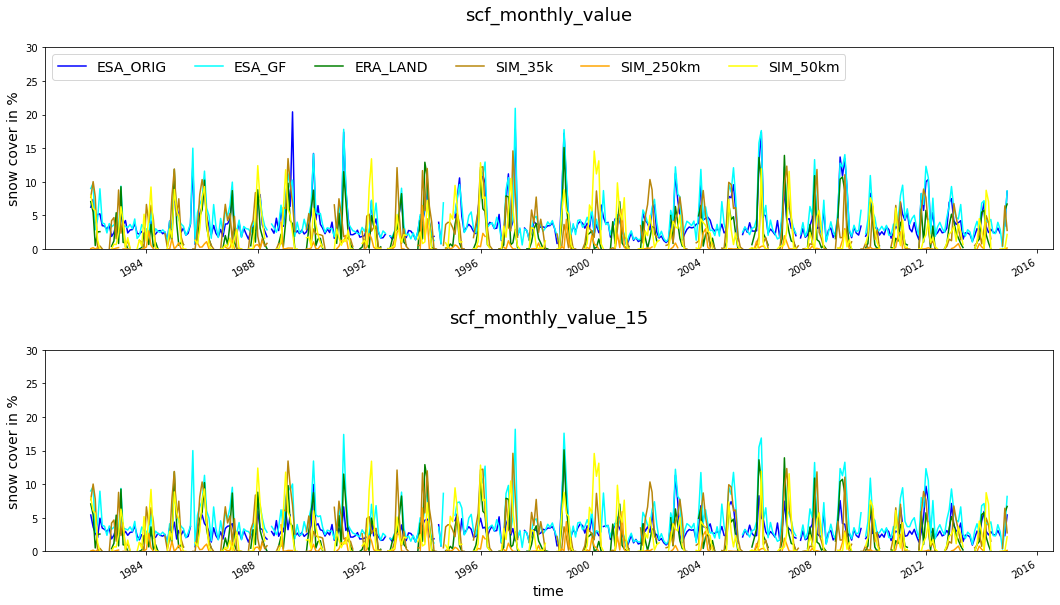

In [66]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
set_size(14,7) 

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

# Loop over all of the models
indice = 0
for par in parameters_scf:
    for key in keys_dic:
        monthly_values[key][par].where(monthly_values[key][par] != 0).mean(dim=['lon','lat']).plot.line(ax=axs[indice], ylim=(0,30), color=colors[key], add_legend=True)
    
    axs[indice].set_ylabel('snow cover in %',  fontsize=14)
    axs[indice].set_xlabel('',  fontsize=14)
    axs[indice].set_title(parameters_scf[indice]+'\n',  fontsize=18)
    indice = indice + 1
    
axs[0].legend(labels=keys_dic, ncol=6, loc='upper left', fontsize=14)
axs[1].set_xlabel('time',  fontsize=14)      
# plt.savefig(output_path+'/scf_monthly_value_wet_months_average_large_domaine.pdf')